Prediction Without Wavelets

In [ ]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pywt
from tensorflow.keras.models import load_model

In [ ]:
#importing datasets
df1 = pd.read_csv("/content/drive/MyDrive/FYP/Code1/Datasets/SN_d_tot_V2.0.csv")      #sunspot dataset
df1.shape

(75147, 8)

In [ ]:
df2 =pd.read_csv('/content/drive/MyDrive/FYP/Code1/Solar Flares Dataset/dataset.csv', #Solar flares dataset
				sep = ';',
				engine = 'python')
df2.shape

(7320, 15)

In [ ]:
df1.columns = ['year','month', 'date','date_in_Fraction', 'daily total sunspot number', 'daily std dev','number of stations', 'definitive/provisional marker']

In [ ]:
#selecting common time frame where both datasets are available - between 1st Jan 1997 and 15th Jan 2017
val = df1.loc[df1['year'] >= 1997]
val = val.loc[val['year'] < 2017]
df1 = df1.loc[ df1['year'] == 2017 ]
df1 = df1.loc[ df1['month'] == 1 ]
df1 = df1.loc[ df1['date'] <= 15 ]
df1 = pd.concat( [val,df1],  ignore_index=True)
df1

,year,month,date,date_in_Fraction,daily total sunspot number,daily std dev,number of stations,definitive/provisional marker
0,1997,1,1,1997.001,0,2.0,20,0
1,1997,1,2,1997.004,0,2.0,20,0
2,1997,1,3,1997.007,0,2.0,17,0
3,1997,1,4,1997.010,14,9.4,10,0
4,1997,1,5,1997.012,13,3.2,16,0
...,...,...,...,...,...,...,...,...
7315,2017,1,11,2017.029,0,0.0,35,0
7316,2017,1,12,2017.032,11,1.5,24,0
7317,2017,1,13,2017.034,26,2.4,25,0
7318,2017,1,14,2017.037,31,2.0,13,0


In [ ]:
df1.shape

(7320, 8)

In [ ]:
#Extracting Independent and dependent Variable

x= df1['daily total sunspot number']
y= df2['c_class_flares']

In [ ]:
len(x),len(y)

(7320, 7320)

In [ ]:
# Define LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(1, 1)))
model.add(Dense(units=1))  # Output layer

In [ ]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32,verbose=1)

Epoch 1/100
183/183 [==============================] - 2s 2ms/step - loss: 13.3192
Epoch 2/100
183/183 [==============================] - 1s 3ms/step - loss: 9.0721
Epoch 3/100
183/183 [==============================] - 0s 2ms/step - loss: 8.5017
Epoch 4/100
183/183 [==============================] - 0s 2ms/step - loss: 8.3358
Epoch 5/100
183/183 [==============================] - 0s 2ms/step - loss: 8.2457
Epoch 6/100
183/183 [==============================] - 0s 2ms/step - loss: 8.2223
Epoch 7/100
183/183 [==============================] - 0s 2ms/step - loss: 8.1784
Epoch 8/100
183/183 [==============================] - 0s 2ms/step - loss: 8.1877
Epoch 9/100
183/183 [==============================] - 1s 3ms/step - loss: 8.1700
Epoch 10/100
183/183 [==============================] - 1s 3ms/step - loss: 8.2260
Epoch 11/100
183/183 [==============================] - 0s 2ms/step - loss: 8.1715
Epoch 12/100
183/183 [==============================] - 1s 3ms/step - loss: 8.1838
Epoch 13/100

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.save('/content/drive/MyDrive/FYP/Code2/lstm_without_wavelets.h5')

# Load the model back from the file
model = load_model('/content/drive/MyDrive/FYP/Code2/lstm_without_wavelets.h5')

# Print a summary of the loaded model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Evaluate the machine learning model using the test dataset
loss = model.evaluate(x_test, y_test)
print("Test Loss:", loss)

46/46 [==============================] - 0s 1ms/step - loss: 7.6444
Test Loss: 7.644405841827393


In [ ]:
#predict the test set using model
predictions = model.predict(x_test)



46/46 [==============================] - 0s 1ms/step


In [ ]:
# Calculate RMSE
rmse = math.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, predictions)
print("R-squared (R2) Score:", r2)

Root Mean Squared Error (RMSE): 2.7648517076165176
R-squared (R2) Score: 0.4494705734157728


Prediction With Wavelets

In [ ]:
x_train.shape

(5856,)

In [ ]:
y_train.shape

(5856,)

In [ ]:
#Apply DWT to 'x_train' data using the 'db2' wavelet
# Decompose the data to 11 levels with a specified mode ('smooth')

wav_coef_x=pywt.wavedec(x_train, 'db2', level=11,mode='smooth')

In [ ]:
#Apply DWT to 'y_train' data using the 'db2' wavelet
# Decompose the data to 11 levels with a specified mode ('antireflect')
wav_coef_y=pywt.wavedec(y_train, 'db2', level=11,mode='antireflect')

In [ ]:
wav_coef_x

[array([1.53328049e+07, 3.60313657e+06, 3.35561806e+03, 3.55526827e+03,
        3.46910324e+03]),
 array([ 0.00000000e+00, -9.64550172e+05, -5.91194653e+00, -1.41093078e+02,
        -1.13686838e-13]),
 array([ 1.16415322e-10, -3.33155442e+05,  2.17096036e+01, -5.92231622e+01,
        -6.25727826e+01, -5.53788782e+01, -1.17782483e+02,  0.00000000e+00]),
 array([ 0.00000000e+00, -1.14964576e+05, -6.07966948e+01, -1.49281206e+01,
        -3.62284146e+01, -2.85490824e+01,  9.86892124e+00, -1.85848982e+01,
         1.16980389e+01, -6.59819244e+01,  1.56581967e+01, -5.22786177e+01,
        -3.44512344e+00,  2.84217094e-14]),
 array([ 2.91038305e-11, -3.96378380e+04, -3.81290255e+01, -3.01649644e+01,
         2.06700490e+01,  6.48947952e+01,  1.29976483e+02, -9.50723607e+01,
         3.31613415e+01,  6.93839692e+01, -1.10697598e+02, -6.04886527e+00,
        -1.38161847e+02, -1.25889811e+02,  8.34033603e+01,  1.27672945e+02,
        -7.49402775e+01, -2.85637300e+01, -7.51004446e+01,  6.0358939

In [ ]:
wav_coef_y

[array([-16514.28174342,  -4447.8509065 ,    124.69791296,    134.69924564,
           102.41104357]),
 array([-372.53470404, 1222.30560407,    1.80042846,   15.37861765,
         -15.71810202]),
 array([-1.41120293e+02,  4.80071838e+02,  3.76053417e+00, -1.99939297e-01,
        -1.99851829e+00, -9.98252302e-01,  1.19011543e+01, -1.16080845e+01]),
 array([-5.17371389e+01,  1.90357091e+02, -1.46707450e+00, -1.45538577e+00,
        -1.02905112e+00, -2.78142550e+00, -1.83771031e+00, -5.02172361e-01,
        -1.74052854e-01, -2.64416895e+00, -2.42538979e+00, -3.73772907e+00,
         2.10794459e+00,  2.93121925e+00]),
 array([-18.14684955,  73.59048203,  -4.17397896,   3.00299131,
          3.3005159 ,   2.48337694,   6.79190493,  -1.57325372,
         -3.25336269,   6.59553418,  -2.75651475,  -0.24735912,
         -2.41874268,  -5.96192941,   4.37358461,  -1.35171502,
         -3.93261494,  -2.5857415 ,  -5.94046242,   2.91588834,
         -0.69640952,  -5.40639605,  -3.27770385,  11.1531

In [ ]:
print(len(wav_coef_x))

12


In [ ]:
#converting "x_train"'s wavelet coefficients to 1 D list
wav_coef_flat_x=[]
for i in wav_coef_x:
  for j in i:
    wav_coef_flat_x.append(j)

In [ ]:
#converting "y_train"'s wavelet coefficients to 1 D list
wav_coef_flat_y=[]
for i in wav_coef_y:
  for j in i:
    wav_coef_flat_y.append(j)

In [ ]:
wav_coef_flat_y

[-16514.281743417618,
 -4447.850906504113,
 124.69791296112918,
 134.69924564424298,
 102.41104356800432,
 -372.5347040429633,
 1222.305604066251,
 1.800428459086497,
 15.378617648188989,
 -15.71810202220598,
 -141.12029292620184,
 480.07183752065663,
 3.76053417141736,
 -0.19993929654556197,
 -1.9985182933132322,
 -0.9982523016456941,
 11.90115427326144,
 -11.608084545471458,
 -51.73713892915336,
 190.35709103265611,
 -1.4670744957539616,
 -1.4553857653976756,
 -1.0290511169758005,
 -2.781425498631992,
 -1.8377103068136424,
 -0.5021723607420734,
 -0.1740528543652804,
 -2.644168946036773,
 -2.4253897890550364,
 -3.737729066318587,
 2.107944588571252,
 2.9312192451918495,
 -18.146849554030553,
 73.59048203015647,
 -4.1739789587408005,
 3.002991314694908,
 3.3005159031000604,
 2.4833769426231607,
 6.79190493023664,
 -1.5732537242641262,
 -3.253362693287701,
 6.5955341803558385,
 -2.7565147493370494,
 -0.24735912144962136,
 -2.4187426756277572,
 -5.961929411506846,
 4.373584608950264,
 -1

In [ ]:
#printing length of flattened wavelet coefficients used for training model
len(wav_coef_flat_x)

5881

In [ ]:
#for arr in wav_coef_flat_x:
#  print(arr.size)

In [ ]:
len(wav_coef_flat_y)

5881

In [ ]:
# Define LSTM model
model1 = Sequential()
model1.add(LSTM(units=50, input_shape=(1, 1)))
model1.add(Dense(units=1))

In [ ]:
# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error',run_eagerly=True)

In [ ]:
#reshaping array apt for model training
wav_coef_flat_x=np.array(wav_coef_flat_x)
wav_coef_flat_x = np.reshape(wav_coef_flat_x, (wav_coef_flat_x.shape[0], 1, 1))

In [ ]:
wav_coef_flat_y=np.array(wav_coef_flat_y)
wav_coef_flat_y = np.reshape(wav_coef_flat_y, (wav_coef_flat_y.shape[0], 1, 1))

In [ ]:
#model training
model1.fit(wav_coef_flat_x, wav_coef_flat_y, epochs=100, batch_size=32,verbose=1)

Epoch 1/100
184/184 [==============================] - 5s 28ms/step - loss: 50102.7617
Epoch 2/100
184/184 [==============================] - 5s 25ms/step - loss: 50101.8633
Epoch 3/100
184/184 [==============================] - 5s 28ms/step - loss: 50100.2734
Epoch 4/100
184/184 [==============================] - 5s 25ms/step - loss: 50098.9297
Epoch 5/100
184/184 [==============================] - 6s 31ms/step - loss: 50098.0156
Epoch 6/100
184/184 [==============================] - 5s 28ms/step - loss: 50096.7422
Epoch 7/100
184/184 [==============================] - 5s 25ms/step - loss: 50095.5820
Epoch 8/100
184/184 [==============================] - 5s 28ms/step - loss: 50094.9375
Epoch 9/100
184/184 [==============================] - 5s 25ms/step - loss: 50093.8320
Epoch 10/100
184/184 [==============================] - 5s 25ms/step - loss: 50092.7070
Epoch 11/100
184/184 [==============================] - 5s 28ms/step - loss: 50092.1172
Epoch 12/100
184/184 [===================

In [ ]:
#saving the model
model1.save("/content/drive/MyDrive/FYP/Code1/lstm_with_wav.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the model
model_using_wavelets = load_model("/content/drive/MyDrive/FYP/Code 2/lstm_with_wav_c.h5")

In [ ]:
model_using_wavelets.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                10400     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
x_test.shape

(1464,)

In [ ]:
y_test.shape

(1464,)

In [ ]:
#Apply DWT to 'x_test' data using the 'db2' wavelet
# Decompose the data to 11 levels with a specified mode ('smooth')
wav_coef_x=pywt.wavedec(x_test, 'db2', level=11,mode='smooth')

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 11 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [ ]:
#Apply DWT to 'y_test' data using the 'db2' wavelet
# Decompose the data to 11 levels with a specified mode ('antireflect')
wav_coef_y=pywt.wavedec(y_test, 'db2', level=11,mode='antireflect')

In [ ]:
wav_coef_x

In [ ]:
wav_coef_y

[array([330950.5873544 ,  90595.19828753,   6282.51198225]),
 array([  7449.36253621, -25054.13068787,  17604.76815166]),
 array([ 2867.34174792, -9357.02683912,    11.15800418,  6478.52708701]),
 array([ 1.10486816e+03, -3.59570476e+03,  2.34070366e+00,  2.97952541e+01,
        -2.99081532e+01]),
 array([ 4.26040397e+02, -1.38444344e+03, -3.31086857e+00, -1.29958834e+00,
        -1.17561669e+00,  6.04578593e-01,  3.24341117e+01, -3.41257473e+01]),
 array([ 1.65163611e+02, -5.29050529e+02,  1.18848007e+00,  9.18054843e-01,
        -1.29794144e+00,  2.78013560e+00, -9.78037556e-01,  3.31857833e+00,
        -3.36468069e+00,  1.34433200e-01, -2.17491008e-01, -5.15300663e+00,
         4.89244433e+00,  3.46701086e-01]),
 array([ 6.52878877e+01, -1.99416810e+02, -6.44866532e+00, -4.14982587e-01,
         2.36123408e+00, -5.30719801e+00,  3.30086687e+00,  1.82220819e+00,
        -6.35043557e+00,  6.24488012e-01,  3.12600784e+00, -2.31265873e-01,
         3.25193997e+00,  3.39177865e-01, -2.71

In [ ]:
len(wav_coef_x)

12

In [ ]:
#converting "x_test"'s wavelet coefficients to 1 D list
wav_coef_flat_x=[]
for i in wav_coef_x:
  for j in i:
    wav_coef_flat_x.append(j)

In [ ]:
#converting "y_test"'s wavelet coefficients to 1 D list
wav_coef_flat_y=[]
for i in wav_coef_y:
  for j in i:
    wav_coef_flat_y.append(j)

In [ ]:
wav_coef_flat_x

[-8509126.694568884,
 -1995539.469652913,
 2272.742632247874,
 -2.3283064365386963e-10,
 536535.5267371421,
 1.1368683772161603e-13,
 -1.1641532182693481e-10,
 185006.75514690252,
 119.09558573131008,
 2.842170943040401e-14,
 1.4551915228366852e-11,
 63821.27297062392,
 0.5186669460480573,
 397.3277672185445,
 0.0,
 0.0,
 22002.775187799656,
 -35.985130958981756,
 -11.595428805911482,
 58.694708766369274,
 -18.77176317911325,
 366.47545404043063,
 -1.4210854715202004e-14,
 1.8189894035458565e-12,
 7594.983746268254,
 2.324930973601255,
 39.66261333819973,
 -64.95878809400493,
 10.346424643470655,
 21.585639077633857,
 -36.61360790220898,
 22.189644232035306,
 3.517987769365334,
 29.083778979528745,
 -96.81461806637677,
 60.75972357607783,
 9.237055564881302e-14,
 -9.094947017729282e-13,
 2620.1607183483047,
 -69.86344231856529,
 12.79154311313394,
 6.009075228288296,
 -165.18510388769772,
 82.21690613452095,
 -5.092765068143812,
 -97.19191672233342,
 -34.60706915054946,
 38.52088918173

In [ ]:
wav_coef_flat_y

[330950.5873543975,
 90595.19828753074,
 6282.511982247392,
 7449.362536207904,
 -25054.130687870547,
 17604.768151662647,
 2867.3417479201908,
 -9357.026839115026,
 11.15800418053333,
 6478.527087014312,
 1104.8681620264742,
 -3595.704756300307,
 2.340703659375115,
 29.79525410533858,
 -29.908153229791836,
 426.0403970498537,
 -1384.4434352698208,
 -3.3108685719773554,
 -1.2995883425508277,
 -1.1756166885906092,
 0.6045785934879415,
 32.43411171827284,
 -34.12574733134727,
 165.16361057686197,
 -529.0505294839802,
 1.188480069412602,
 0.9180548432265807,
 -1.2979414429754357,
 2.7801356005319398,
 -0.9780375561189056,
 3.3185783344844526,
 -3.364680689613538,
 0.134433199829874,
 -0.21749100783261666,
 -5.153006633426166,
 4.892444329396086,
 0.34670108636614966,
 65.28788773153713,
 -199.41681017845713,
 -6.448665316046068,
 -0.41498258693826173,
 2.3612340754412617,
 -5.307198008648578,
 3.300866869272461,
 1.822208186225296,
 -6.350435568879899,
 0.6244880123566503,
 3.126007844045

In [ ]:
len(wav_coef_flat_x)

1490

In [ ]:
wav_coef_flat_x

[-8509126.694568884,
 -1995539.469652913,
 2272.742632247874,
 -2.3283064365386963e-10,
 536535.5267371421,
 1.1368683772161603e-13,
 -1.1641532182693481e-10,
 185006.75514690252,
 119.09558573131008,
 2.842170943040401e-14,
 1.4551915228366852e-11,
 63821.27297062392,
 0.5186669460480573,
 397.3277672185445,
 0.0,
 0.0,
 22002.775187799656,
 -35.985130958981756,
 -11.595428805911482,
 58.694708766369274,
 -18.77176317911325,
 366.47545404043063,
 -1.4210854715202004e-14,
 1.8189894035458565e-12,
 7594.983746268254,
 2.324930973601255,
 39.66261333819973,
 -64.95878809400493,
 10.346424643470655,
 21.585639077633857,
 -36.61360790220898,
 22.189644232035306,
 3.517987769365334,
 29.083778979528745,
 -96.81461806637677,
 60.75972357607783,
 9.237055564881302e-14,
 -9.094947017729282e-13,
 2620.1607183483047,
 -69.86344231856529,
 12.79154311313394,
 6.009075228288296,
 -165.18510388769772,
 82.21690613452095,
 -5.092765068143812,
 -97.19191672233342,
 -34.60706915054946,
 38.52088918173

In [ ]:
len(wav_coef_flat_y)

1490

In [ ]:
#reshaping wavelet coefficients for prediction
wav_coef_flat_x=np.array(wav_coef_flat_x)
#wav_coef_flat_x = np.reshape(wav_coef_flat_x, (wav_coef_flat_x.shape[0], 1, 1))

wav_coef_flat_x = wav_coef_flat_x.ravel()

In [ ]:
#reshaping wavelet coefficients for prediction
wav_coef_flat_y=np.array(wav_coef_flat_y)
#wav_coef_flat_y = np.reshape(wav_coef_flat_y, (wav_coef_flat_y.shape[0], 1, 1))

wav_coef_flat_y = wav_coef_flat_y.ravel()

In [ ]:
len(wav_coef_flat_x)

1490

In [ ]:
len(wav_coef_flat_y)

1490

In [ ]:
#prediction of the test set
predictions = model1.predict(wav_coef_flat_x)

In [ ]:
len(predictions)

1490

In [ ]:
for arr in predictions:
    print(arr.shape)

(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)


In [ ]:
predictions

array([[-1.7306687 ],
       [-1.7306687 ],
       [-0.12140691],
       ...,
       [-1.7038343 ],
       [-0.40388805],
       [-7.573626  ]], dtype=float32)

In [ ]:
# Calculate RMSE and R2 score between the input and output wavelet coefficients
#prediction of the test set
predictions = model_using_wavelets.predict(wav_coef_flat_x)

from sklearn.metrics import mean_squared_error, r2_score
import math

rmse = math.sqrt(mean_squared_error(wav_coef_flat_y, predictions))
r2 = r2_score(wav_coef_flat_y, predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Root Mean Squared Error (RMSE): 5.759409404387e-07
R-squared (R2) Score: 0.999999999999999998


In [ ]:
#finding the size of arrays in the original wavelet coefficients list for reconstruction of the predicted wavelets
coeff_x_test_size = []
for a in wav_coef_x:
  coeff_x_test_size.append(len(a));

print(coeff_x_test_size)
len(wav_coef_x)

[3, 3, 4, 5, 8, 14, 25, 48, 94, 185, 368, 733]


12

In [ ]:
#reshaping the predicted wavelets array into original shape for resonstruction
reconstructed_output = []
index = 0
for i in range(len(coeff_x_test_size)):

  l = []
  for j in range(coeff_x_test_size[i]):
    l.append(predictions[index])
    index += 1
  reconstructed_output.append(np.array(l))


In [ ]:
rec1=np.array(reconstructed_output)

<ipython-input-59-eb7e9b6df222>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  rec1=np.array(reconstructed_output)


In [ ]:
type(rec1)

numpy.ndarray

In [ ]:
type(rec1[0])

numpy.ndarray

In [ ]:
rec2=list(rec1)

In [ ]:
type(rec2)

list

In [ ]:
type(rec2[0])

numpy.ndarray

In [ ]:
type(wav_coef_x)

list

In [ ]:
type(wav_coef_x[0])

numpy.ndarray

In [ ]:
for arr in rec2:
    print(arr.shape)

(3, 1)
(3, 1)
(4, 1)
(5, 1)
(8, 1)
(14, 1)
(25, 1)
(48, 1)
(94, 1)
(185, 1)
(368, 1)
(733, 1)


In [ ]:
#resonstruction of the predicted wavelet coefficients
rec_y = pywt.waverec(rec2, 'db2',mode="antireflect")

In [ ]:
#finding RMS and R2 Score between original y_test wave and resonstructed wave after prediction
print("RMSE : ",math.sqrt(mean_squared_error(y_test,rec_y)))

In [ ]:
print("R2 Score : ",r2_score(y_test,rec_y))

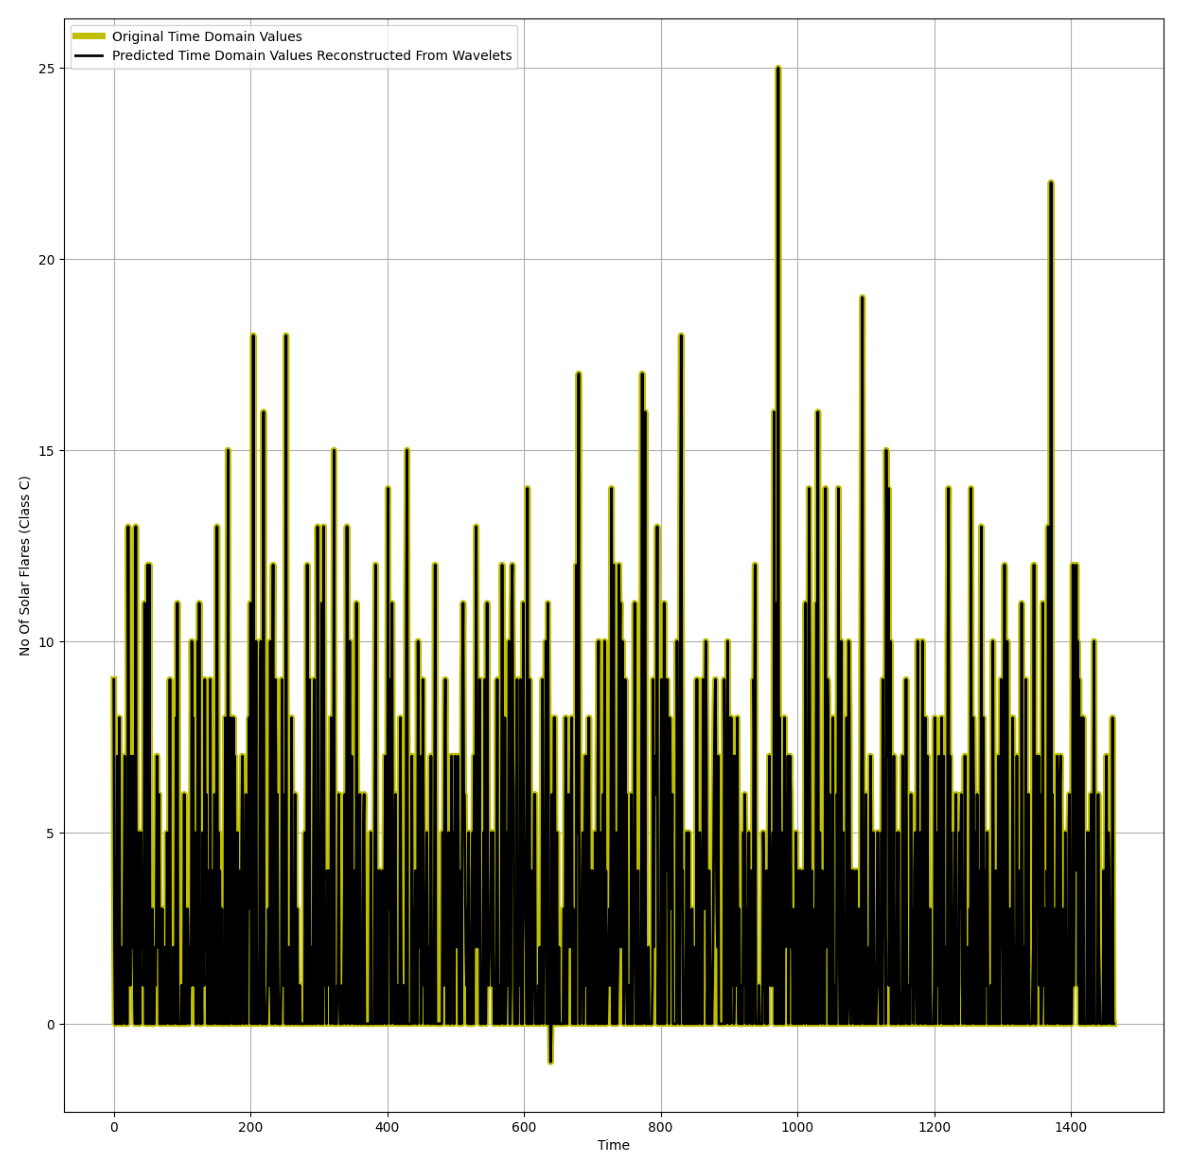

In [280]:
plt.figure(figsize=(15,15))

plt.plot(range(len(y_test)), rec_y, label='Predicted Time Domain Values Reconstructed From Wavelets', color='r', linewidth=1)

plt.xlabel('Time')
plt.ylabel('No Of Solar Flares (Class C)')

plt.legend()

plt.grid(True)

plt.show()


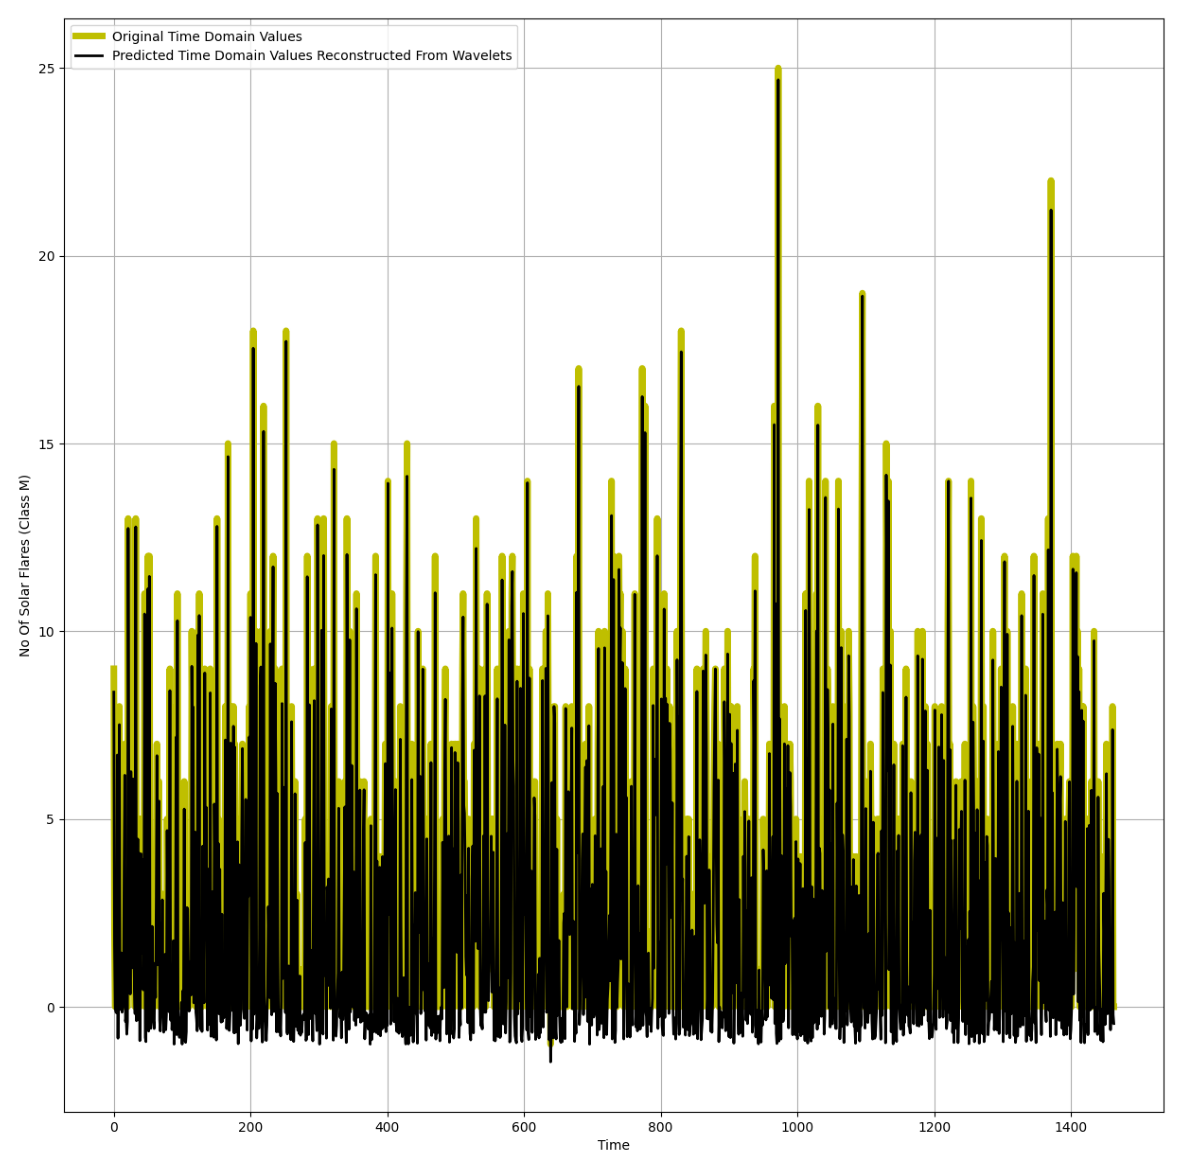

In [281]:
plt.figure(figsize=(15,15))

plt.plot(range(len(y_test)), rec_y, label='Predicted Time Domain Values Reconstructed From Wavelets', color='r', linewidth=1)

plt.xlabel('Time')
plt.ylabel('No Of Solar Flares (Class C)')

plt.legend()

plt.grid(True)

plt.show()


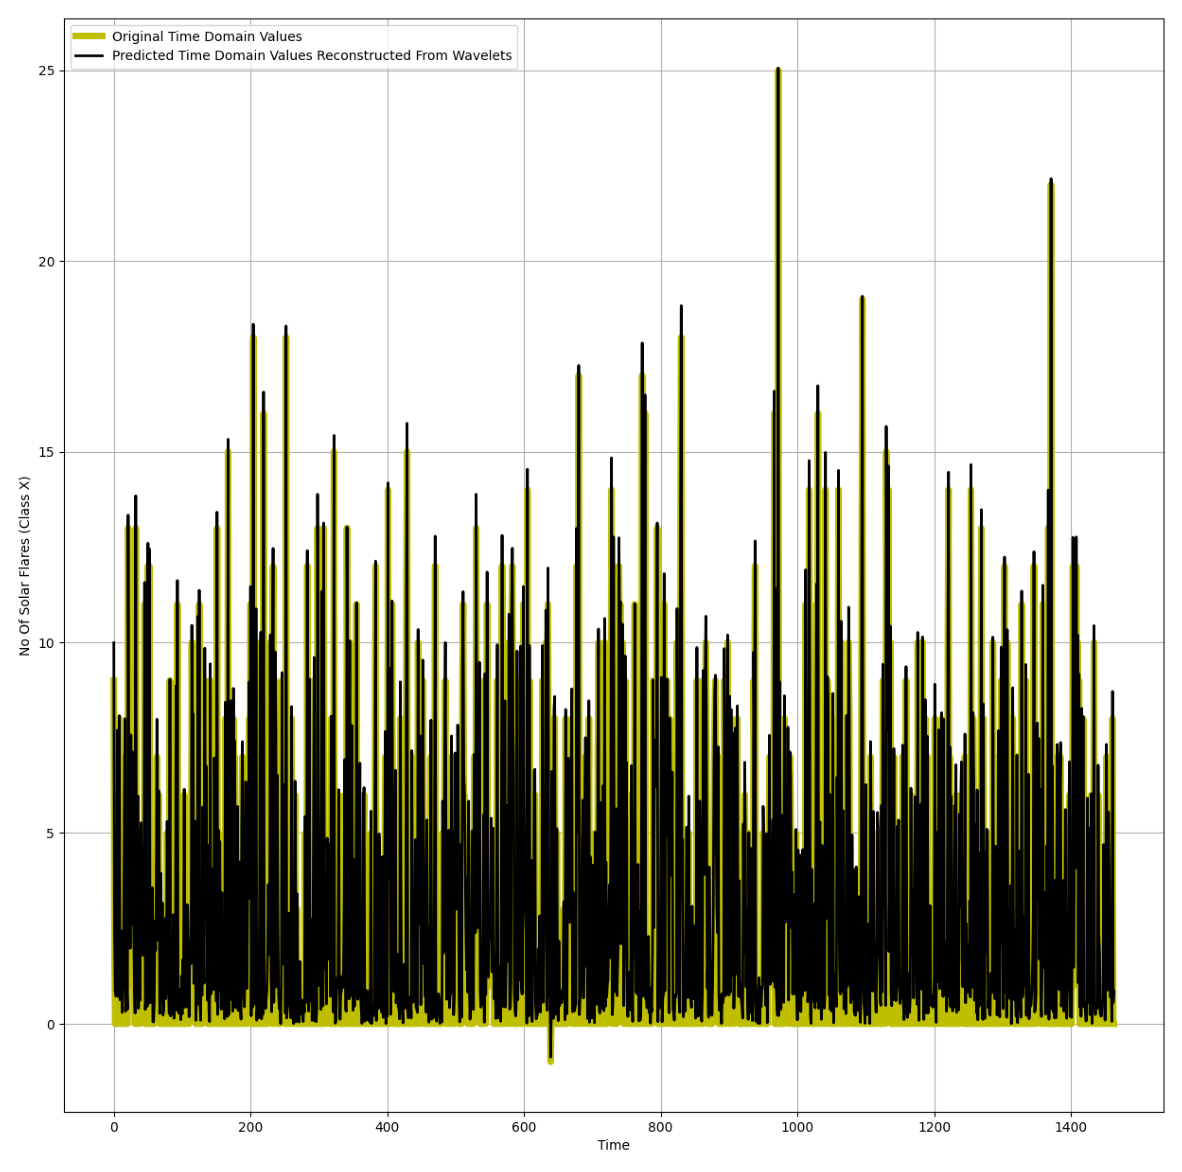

In [282]:
plt.figure(figsize=(15,15))

plt.plot(range(len(y_test)), rec_y, label='Predicted Time Domain Values Reconstructed From Wavelets', color='r', linewidth=1)

plt.xlabel('Time')
plt.ylabel('No Of Solar Flares (Class C)')

plt.legend()

plt.grid(True)

plt.show()
